<a href="https://colab.research.google.com/github/ddarshana04/Machine-Learning/blob/main/SVM/Letter_recognition_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
import math
import seaborn as sns
from statistics import mean
from math import sqrt

In [8]:
data = pd.read_csv("letter-recognition.csv",header=0)
#header 0 means the 1st row

In [9]:
data.head(10) 

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


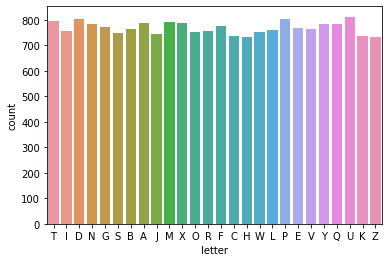

In [10]:
sns.countplot(data['letter'])

In [11]:
x = data.iloc[:, 1:]
y = data['letter'].tolist()
print(x)

# Select 4000 rows data as a testing dataset
x_test = x.iloc[0:4000, :].values.astype('float32') # all pixel values 
y_test = y[0:4000] # Select label for testing data
x_train = x.iloc[4000:, :].values.astype('float32') # all pixel values 
y_train = y[4000:]

       xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0          2      8       3       5       1      8     13      0       6   
1          5     12       3       7       2     10      5      5       4   
2          4     11       6       8       6     10      6      2       6   
3          7     11       6       6       3      5      9      4       6   
4          2      1       3       1       1      8      6      6       6   
...      ...    ...     ...     ...     ...    ...    ...    ...     ...   
19995      2      2       3       3       2      7      7      7       6   
19996      7     10       8       8       4      4      8      6       9   
19997      6      9       6       7       5      6     11      3       7   
19998      2      3       4       2       1      8      7      2       6   
19999      4      9       6       6       2      9      5      3       1   

       xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0           6      10  

In [12]:
print((min(x_train[2]), max(x_train[2])))

(1.0, 12.0)


In [13]:
# Normalizing the data
x_train = x_train/255.0
x_test = x_test/255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (16000, 16)
16000 train samples
4000 test samples


In [14]:
# Train the svm algorithm
model_clf = svm.SVC(C=5, kernel ='poly')
model_clf.fit(x_train, y_train)

SVC(C=5, kernel='poly')

In [15]:
# aaply the trained learner to test new data
y_pred = model_clf.predict(x_test)

In [16]:
#multi-class confusion matrix for each class
lst_actual_class = y_test
lst_predicted_class = y_pred
lst_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]


In [17]:
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

In [18]:
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
store_prec = [];
store_fscore = [];
store_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

Print Class: 0
Print Class: 1
Print Class: 2
Print Class: 3
Print Class: 4
Print Class: 5
Print Class: 6
Print Class: 7
Print Class: 8
Print Class: 9
Print Class: 10
Print Class: 11
Print Class: 12
Print Class: 13
Print Class: 14
Print Class: 15
Print Class: 16
Print Class: 17
Print Class: 18
Print Class: 19
Print Class: 20
Print Class: 21
Print Class: 22
Print Class: 23
Print Class: 24
Print Class: 25


In [19]:
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)

    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    store_prec.append(precision);
    store_fscore.append(f1Score);
    store_mcc.append(MCC);

In [20]:
print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));

TP=134, FP=0, TN=3865, FN=1


In [21]:
print("Sensitivity: {0}".format(sensitivity));
print("Specificity: {0}".format(specificity));

Sensitivity: 0.993
Specificity: 1.0


In [22]:
print("Accuracy: {0}".format(accuracy));
print("Balanced Accuracy: {0}".format(balanced_accuracy));

Accuracy: 1.0
Balanced Accuracy: 0.996


In [23]:
print("Precision: {0}".format(precision));

Precision: 1.0


In [24]:
print("F1-Score: {0}".format(f1Score));

F1-Score: 0.996


In [25]:
print("MCC: {0}\n".format(MCC));

MCC: 0.996

